In [1]:
import pandas as pd
import numpy as np
import tpot
import sklearn
import shap
import matplotlib
import seaborn 

print("pandas    :", pd.__version__)
print("numpy     :", np.__version__)
print("tpot      :", tpot.__version__)
print("scikit-learn:", sklearn.__version__)
print("shap      :", shap.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", seaborn.__version__)



c:\Users\Afra\AppData\Local\Programs\Python\Python39\lib\site-packages\stopit\__init__.py:10: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


pandas    : 2.2.3
numpy     : 1.23.0
tpot      : 0.12.2
scikit-learn: 1.4.2
shap      : 0.45.1
matplotlib: 3.9.0
seaborn: 0.13.2


 PCA Biplot of Input Space by year.

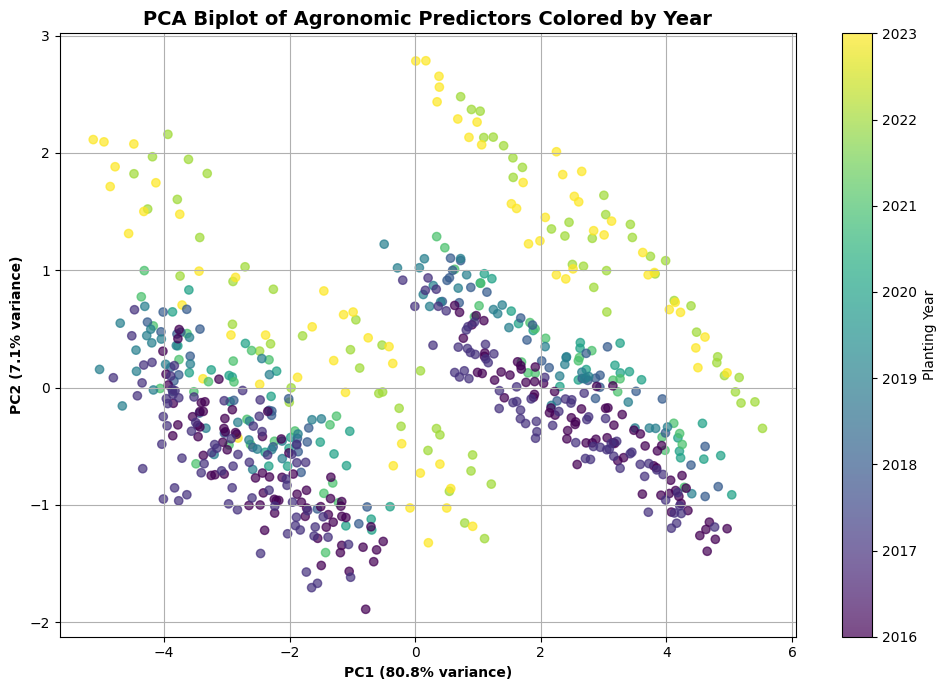

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_excel('Dataset_11_features.xlsx')

# Input features and the year column
input_features = ['YER', 'DAT', 'WS', 'CWC', 'PP', 'GP', 'GW', 'GY', 'RWC', 'RS', 'CT']
X = df[input_features]
years = df['YER']

# Standardize the features (excluding the year for scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.drop(columns='YER'))

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Year'] = years

# Plot PCA biplot by year
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['Year'], cmap='viridis', alpha=0.7
)
plt.colorbar(scatter, label='Planting Year')
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)", fontsize=10, color='black',  weight="bold")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)", fontsize=10, color='black',  weight="bold")
plt.title('PCA Biplot of Agronomic Predictors Colored by Year', fontsize=14, color='black',  weight="bold")
plt.grid(True)
plt.tight_layout()
plt.savefig('ArticleFigures/PCA Biplot of Agronomic Predictors Colored by Year.png', dpi=600, bbox_inches='tight')
plt.show()


 PCA Biplot of Input Space by genotype cluster.

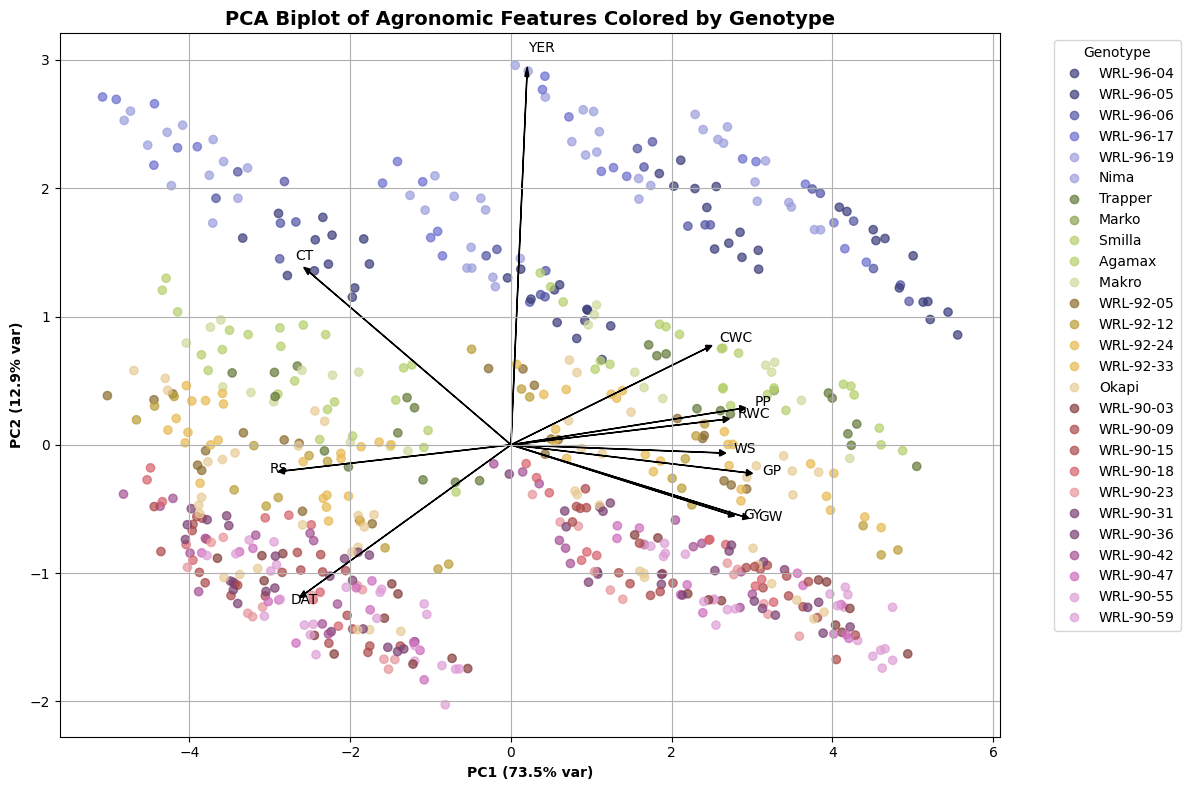

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
df = pd.read_excel('Dataset_11_features.xlsx')

# Input features
input_features = ['YER', 'DAT', 'WS', 'CWC', 'PP', 'GP', 'GW', 'GY', 'RWC', 'RS', 'CT']
X = df[input_features]
genotypes = df['VAR']  # Assuming genotype column is named 'VAR'

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

# Create DataFrame
pca_df = pd.DataFrame(pcs, columns=['PC1', 'PC2'])
pca_df['Genotype'] = genotypes

# Factorize genotypes to numeric codes
pca_df['GenotypeCode'], unique_genotypes = pd.factorize(pca_df['Genotype'])

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    pca_df['PC1'], pca_df['PC2'],
    c=pca_df['GenotypeCode'], cmap='tab20b', alpha=0.7
)
# Legend
handles = scatter.legend_elements(num=None, prop="colors")[0]
labels = unique_genotypes
plt.legend(handles, labels, title="Genotype", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add feature loading vectors
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, feature in enumerate(input_features):
    plt.arrow(0, 0, loadings[i, 0]*3, loadings[i, 1]*3,
              color='black', width=0.002, head_width=0.05)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, feature, color='black')

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% var)", fontsize=10, color='black',  weight="bold")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% var)", fontsize=10, color='black',  weight="bold")
plt.title('PCA Biplot of Agronomic Features Colored by Genotype', fontsize=14, color='black',  weight="bold")
plt.grid(True)
plt.tight_layout()
plt.savefig('ArticleFigures/PCA Biplot of Agronomic Features Colored by Genotype.png', dpi=600, bbox_inches='tight')
plt.show()


Univariate Histograms

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ensure output folder exists
os.makedirs('ArticleFigures', exist_ok=True)

# Load dataset
df = pd.read_excel('Dataset_11_features.xlsx')

# Define features for univariate histograms
features = [
    'YER', 'DAT', 'WS', 'CWC', 'PP', 'GP', 'GW', 'GY', 'RWC', 'RS', 'CT',
    'PALK', 'OLA', 'ECO', 'LINO', 'LINK', 'MUFA', 'PUFA'
]

# Plot + save histograms (300 dpi)
for feature in features:
    fig = plt.figure(figsize=(8, 4))
    ax = sns.histplot(df[feature].dropna(), bins=30, edgecolor='black', alpha=0.85,
                      color='darkorange', kde=True)
    # guard in case kde line is not present
    if getattr(ax, "lines", None):
        if len(ax.lines) > 0:
            ax.lines[0].set_color('black')
    plt.title(f'Distribution of {feature}', fontsize=12, color='black', weight="bold")
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()

    # save as PNG at 300 dpi
    out_path = os.path.join('ArticleFigures', f'{feature}.png')
    fig.savefig(out_path, dpi=600, bbox_inches='tight')

    plt.close(fig)
    plt.show()
